In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('KNN.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Species = list(set(data['Species']))
Specie1 = data[data['Species']==Species[0]]
Specie2 = data[data['Species']==Species[1]]
Specie3 = data[data['Species']==Species[2]]

Text(0.5, 1.0, 'Different Species Visualization')

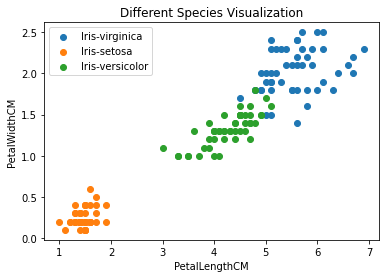

In [4]:
import matplotlib.pyplot as plt
plt.scatter(Specie1['PetalLengthCm'], Specie1['PetalWidthCm'], label=Species[0])
plt.scatter(Specie2['PetalLengthCm'], Specie2['PetalWidthCm'], label=Species[1])
plt.scatter(Specie3['PetalLengthCm'], Specie3['PetalWidthCm'], label=Species[2])
plt.xlabel('PetalLengthCM')
plt.ylabel('PetalWidthCM')
plt.legend()
plt.title('Different Species Visualization')

In [5]:
req_data = data.iloc[:,1:]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
shuffle_index = np.random.permutation(req_data.shape[0])        #shuffling the row index of our dataset
req_data = req_data.iloc[shuffle_index]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
80,5.5,2.4,3.8,1.1,Iris-versicolor
142,5.8,2.7,5.1,1.9,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
135,7.7,3.0,6.1,2.3,Iris-virginica


In [7]:
train_size = int(req_data.shape[0]*0.7)

In [8]:
train_df = req_data.iloc[:train_size,:] 
test_df = req_data.iloc[train_size:,:]
train = train_df.values
test = test_df.values
y_true = test[:,-1]
print('Train_Shape: ',train_df.shape)
print('Test_Shape: ',test_df.shape)

Train_Shape:  (105, 5)
Test_Shape:  (45, 5)


In [9]:
from math import sqrt
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

In [10]:
def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()             #argsort() function returns indices by sorting distances data in ascending order
    data = data[sort_indexes]                      #modifying our data based on sorted indices, so that we can get the nearest neightbours
    return data[:num_neighbors]  

In [11]:
def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count)              #taking the most repeated class
    return predicted

In [12]:
def predict_classifier(x_test):
    classes = []
    neighbors = get_neighbors(x_test, req_data.values, 5)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count)
    print(predicted)
    return predicted

In [13]:
def accuracy(y_true, y_pred):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
    accuracy = num_correct/len(y_true)
    return accuracy

In [14]:
y_pred = []
for i in test:
    y_pred.append(prediction(i, train, 5))
y_pred

['Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa']

In [15]:
accuracy = accuracy(y_true, y_pred)

In [16]:
accuracy

0.9333333333333333

In [17]:
test_df.insert(5, 'Predicted_Species', y_pred, False)

In [18]:
test_df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa,Iris-setosa
136,6.3,3.4,5.6,2.4,Iris-virginica,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica,Iris-virginica
